In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src import bs
from src.data import MarginalInterp, MarginalLogNormal
from src.bass import BassLV

# Black-Scholes analytical marginals

In [23]:
VOL = 0.2
TENORS = [0.25, 0.5, 0.75, 1.0]
EVAL_POINTS = 1000
N_PATHS = 5
SEED = 0xB0BA

In [24]:
marginals = [MarginalLogNormal(t, VOL) for t in TENORS]

t = np.linspace(0, TENORS[-1], EVAL_POINTS)
rng = np.random.default_rng(SEED)
dB_t = rng.normal(size=(N_PATHS, EVAL_POINTS)) * np.sqrt(np.diff(t, prepend=0))
B_t = np.cumsum(dB_t, axis=1)
paths_gt = np.exp(VOL * B_t - VOL ** 2 * t / 2)

In [25]:
bs_an_lv = BassLV().build(marginals)
paths_lv = bs_an_lv.sample(t, N_PATHS, np.random.default_rng(SEED))

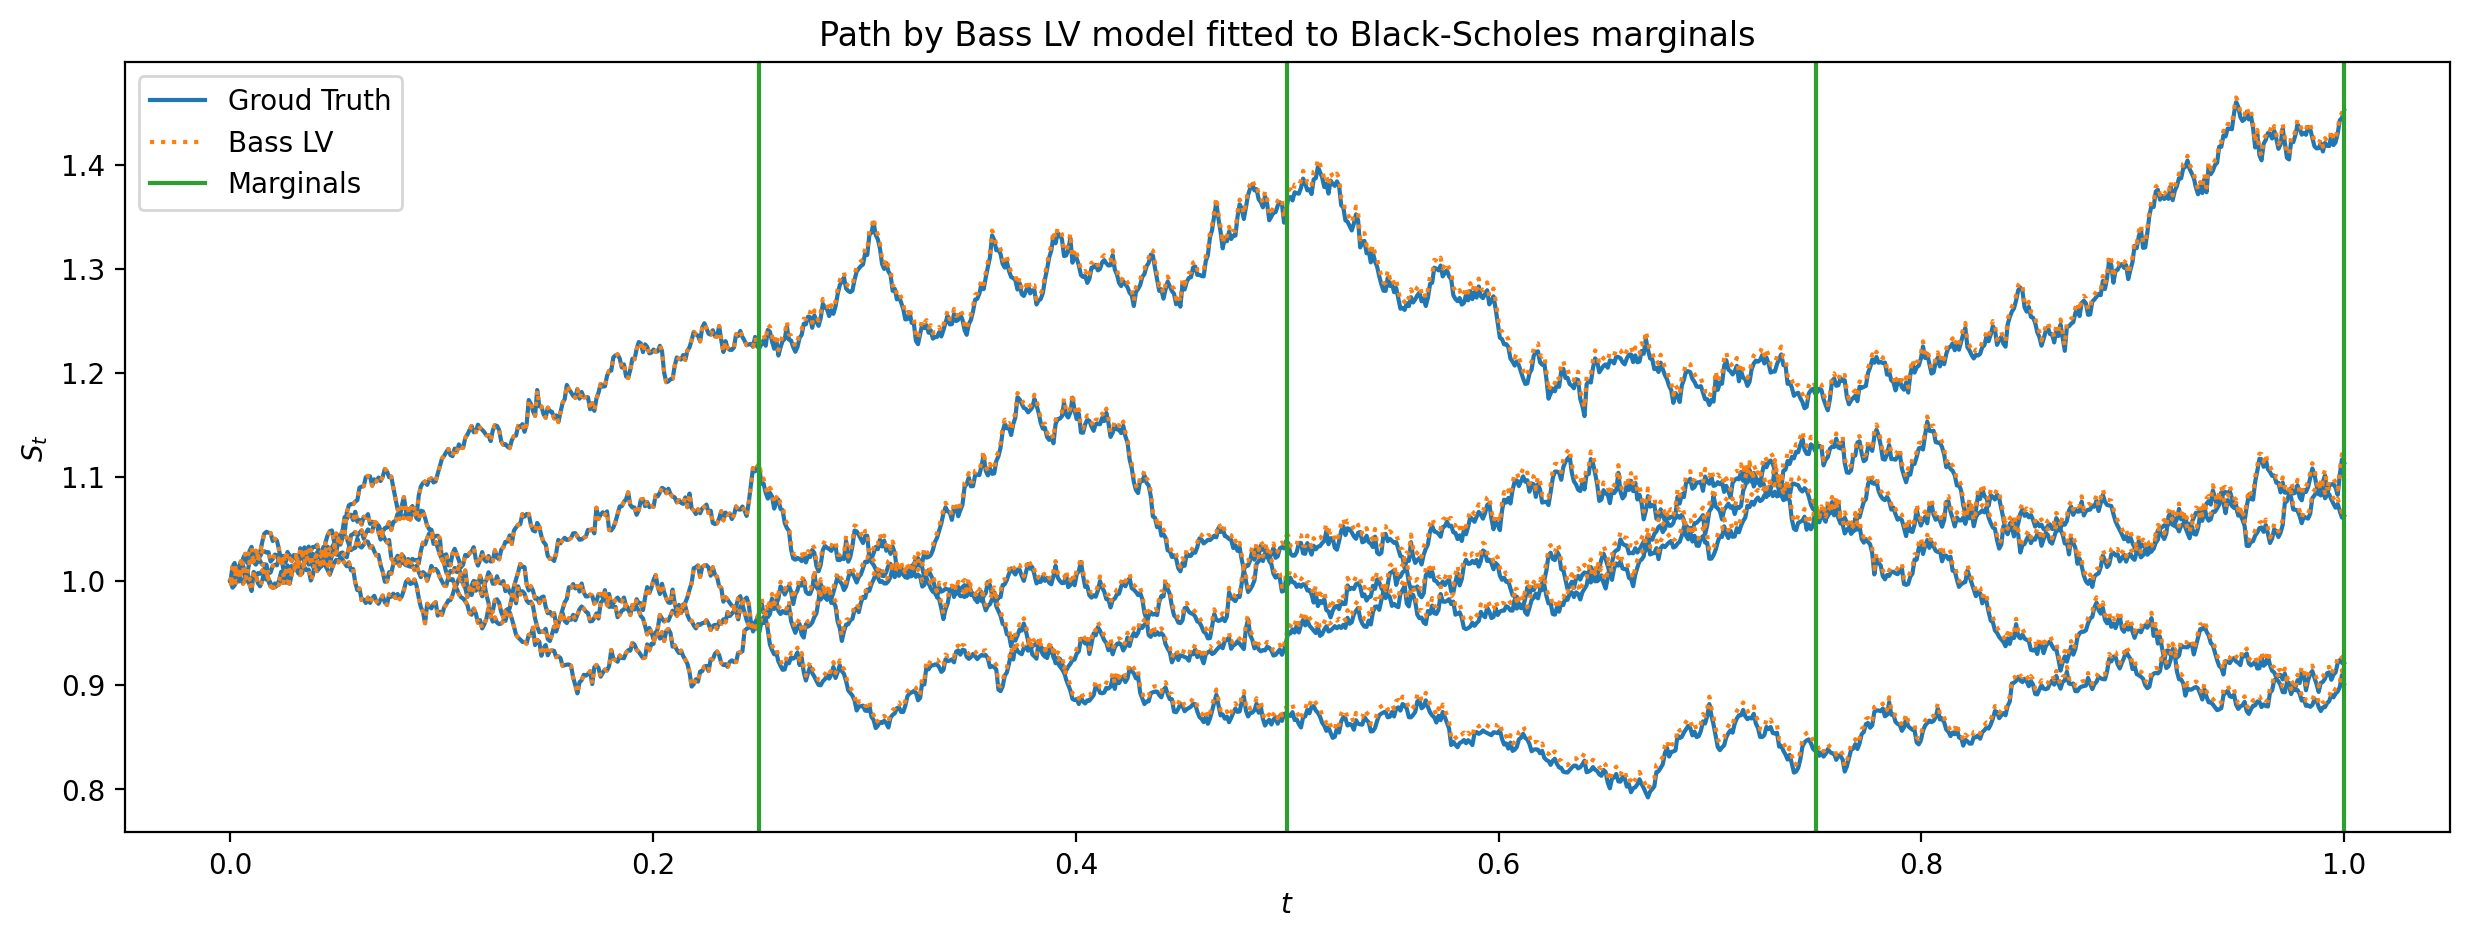

In [26]:
_, ax = plt.subplots(figsize=(15, 5), dpi=200)

handle_gt, *_ = ax.plot(t, paths_gt.T, c="C0")
handle_lv, *_ = ax.plot(t, paths_lv.T, ls=":", c="C1")
for tenor in TENORS:
    handle_t = ax.axvline(tenor, c="C2")

ax.set_xlabel("$t$")
ax.set_ylabel("$S_t$")
ax.set_title("Path by Bass LV model fitted to Black-Scholes marginals")
ax.legend(
    handles=[handle_gt, handle_lv, handle_t],
    labels=["Groud Truth", "Bass LV", "Marginals"],
)

plt.show()